In [107]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [108]:
def wrangle(filepath):
    #  Read CSV file
    df=pd.read_csv(filepath)
    
    #  subset data
    
    #  removing NaN in the industry column  
    mask_ind=df["industry"].notna()
    #  removing fraudulent less than 1  
    mask_fr=df["fraudulent"]>0
    
    df=df[mask_ind & mask_fr]
    
    return df


In [109]:

frame=wrangle("fake_job_postings.csv")
print(frame.shape)
frame.head()

(591, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
357,358,Financing Auto(car) sales,"US, IL, hazelcrest",hr,35000-73000,Looking for adventurous people to join a thriv...,If you have experience in financing for auto s...,prior car sales expprior car loan financing exp,profit sharingcar allowancecompany car,0,0,0,Contract,Associate,NaN,Automotive,NaN,1
493,494,Admin Assistant/ Receptionist,"US, CA, Los Angeles",NaN,23040-28800,NaN,"A Newly established company seeks outgoing, fr...","Must have good knowledge of Outlook, Microsoft...",NaN,0,0,0,Full-time,Entry level,High School or equivalent,Computer Software,Administrative,1


In [110]:
# summary statistics
frame["fraudulent"].value_counts()

1    591
Name: fraudulent, dtype: int64

In [111]:
# summary statistics
frame["industry"].value_counts()

Oil & Energy                   109
Accounting                      57
Hospital & Health Care          51
Marketing and Advertising       45
Financial Services              35
                              ... 
Civic & Social Organization      1
Public Safety                    1
Wholesale                        1
Consumer Goods                   1
Online Media                     1
Name: industry, Length: 62, dtype: int64

In [112]:
# Removing outliers from the industry column

df_group=frame[frame.groupby("industry")["industry"].transform("count")>10].copy()
df_group["industry"].value_counts()

Oil & Energy                           109
Accounting                              57
Hospital & Health Care                  51
Marketing and Advertising               45
Financial Services                      35
Information Technology and Services     32
Telecommunications                      26
Real Estate                             24
Consumer Services                       24
Leisure, Travel & Tourism               21
Health, Wellness and Fitness            15
Hospitality                             14
Computer Networking                     12
Name: industry, dtype: int64

In [113]:
# GROUPING based on the industry

df1=df_group.groupby("industry")


In [114]:
# Creating a dictionary of the industry and its corresponding fraud value

dic={"Accounting":df1.get_group("Accounting")["fraudulent"].sum(),
     "Oil & Energy":df1.get_group("Oil & Energy")["fraudulent"].sum(),
     "Hospital & Health Care":df1.get_group("Hospital & Health Care")["fraudulent"].sum(),
     "Marketing and Advertising": df1.get_group("Marketing and Advertising")["fraudulent"].sum(), 
     "Information Technology and Services":df1.get_group("Information Technology and Services")["fraudulent"].sum(),
     "Telecommunications":df1.get_group("Telecommunications")["fraudulent"].sum(),
     "Real Estate":df1.get_group("Real Estate")["fraudulent"].sum(),
     "Consumer Services":df1.get_group("Consumer Services")["fraudulent"].sum(),
     "Financial Services":df1.get_group("Financial Services")["fraudulent"].sum()}
     
dic

{'Accounting': 57,
 'Oil & Energy': 109,
 'Hospital & Health Care': 51,
 'Marketing and Advertising': 45,
 'Information Technology and Services': 32,
 'Telecommunications': 26,
 'Real Estate': 24,
 'Consumer Services': 24,
 'Financial Services': 35}

In [115]:
# Converting the dictionay to a list

lis1=list(dic.items())

lis1


[('Accounting', 57),
 ('Oil & Energy', 109),
 ('Hospital & Health Care', 51),
 ('Marketing and Advertising', 45),
 ('Information Technology and Services', 32),
 ('Telecommunications', 26),
 ('Real Estate', 24),
 ('Consumer Services', 24),
 ('Financial Services', 35)]

In [116]:
# Creating a new dataframe from the list

fraud_df=pd.DataFrame(lis1)
fraud_df.columns=["INDUSTRY","FRAUD COUNT"]
fraud_df["ABBR"]=["ACC","OIL","HOSP","MART","ICT","TELE","REALT","CONS","FINAN"]

fraud_df


,INDUSTRY,FRAUD COUNT,ABBR
0,Accounting,57,ACC
1,Oil & Energy,109,OIL
2,Hospital & Health Care,51,HOSP
3,Marketing and Advertising,45,MART
4,Information Technology and Services,32,ICT
5,Telecommunications,26,TELE
6,Real Estate,24,REALT
7,Consumer Services,24,CONS
8,Financial Services,35,FINAN


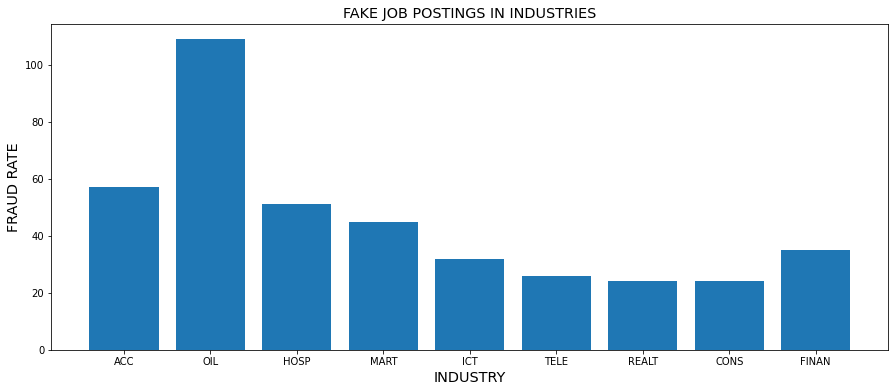

In [117]:
# plotting a histogram

plt.figure(figsize=[15,6])
plt.bar(fraud_df["ABBR"],fraud_df["FRAUD COUNT"])
plt.xlabel("INDUSTRY",fontsize="x-large")
plt.ylabel("FRAUD RATE",fontsize="x-large")
plt.title("FAKE JOB POSTINGS IN INDUSTRIES",fontsize="x-large");

In [ ]:
# From the above plot Oil & Energy has the highes fake job posting with Accounting coming next